<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        HANDWRITTEN DIGIT RECOGNITION with ML CLASSIFICATION MODELS <br>(Multi-Class)
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> SVM - Decision Tree - Random Forest</font></h2>

---
    
<p align="right">
  Duygu Jones | Data Scientist  | Aug 2024 
    <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>


![](https://github.com/Duygu-Jones/Machine-Learning-Projects/blob/main/HandWritten_Digit_Recognition_Multi-Class/img/digits2x.png?raw=true)

## <font color=#20a0ff> <b>Project Description</b><font>

The goal of this project is to accurately classify handwritten digits using a dataset of digit samples. The dataset comprises a sequence of 16 features representing various characteristics of the handwritten digits.

![](https://github.com/Duygu-Jones/Machine-Learning-Projects/blob/main/HandWritten_Digit_Recognition_Multi-Class/img/digits3.png?raw=true)
    
### <font color=#20a0ff> <b>Problem Statement</b><font>
 
The accurate classification of handwritten digits is a critical task in the field of computer vision, with applications ranging from automated postal mail sorting to digit recognition in educational tools. Despite the availability of advanced machine learning techniques, achieving high accuracy in digit classification remains challenging due to variations in handwriting styles, sizes, and shapes. 

This project aims to address this challenge by developing and evaluating three machine learning models—Support Vector Machine (SVM), Random Forest, and Decision Tree—to classify handwritten digits based on their trajectory characteristics. The goal is to determine which model performs best in terms of accuracy, precision, recall, and F1-score, thereby providing a robust solution for digit recognition tasks.

The outcomes of this study will contribute to the understanding of model performance on image-based data and may be applied in various practical scenarios requiring digit recognition.


### <font color=#20a0ff> <b>Objectives</b><font>
- **Data Preprocessing:** Clean and prepare the data for model training.
- **Model Development:** Implement Support Vector Machine (SVM), Random Forest, and Decision Tree classifiers.
- **Model Training and Evaluation:** Train the models on the training set and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.
- **Model Comparison:** Compare the models to identify the best performer in terms of classification accuracy and generalization.
- **Conclusion:** Summarize the findings and provide recommendations for potential improvements.

*The dataset and results are used for educational purposes, demonstrating the application of machine learning techniques on image-based data. The aim is to build effective machine learning models to classify handwritten digits and to gain a deeper understanding of these techniques.*

### <font color=#20a0ff> <b>About the Dataset</b><font>
The dataset consists of samples of handwritten digits, where each sample is represented by a set of 16 features derived from the digit's trajectory. These features capture various aspects of the digit's shape and movement during writing.

- **Dataset:** Handwritten Digits Dataset
- **Content:** Data on various features extracted from handwritten digits.
- **Number of Rows:** 10992
- **Number of Columns:** 17 (16 input features + 1 class label)


| **INPUTS**      | **Description**                                                                                     |
|-----------------|-----------------------------------------------------------------------------------------------------|
| **input1-input16** | Integer values representing different characteristics of the digit's trajectory, such as coordinates and angles. |
| **class**       | Categorical variable representing the digit label (0-9).                                            |


The dataset is commonly used for training and evaluating machine learning models to recognize handwritten digits, making it an ideal candidate for classification tasks in computer vision.


**Relevant Paper:**
- Alimoglu, F., & Alpaydin, E. (1997, August). Combining multiple representations and classifiers for pen-based handwritten digit recognition. In Proceedings of the Fourth International Conference on Document Analysis and Recognition (Vol. 2, pp. 637-640). IEEE. DOI: 10.24432/C5MG6K 

**Table of Contents**

2. <a href='#eda'>EXPLORATORY DATA ANALYSIS (EDA)</a>
   - 2.1 <a href='#basic-statistics'>Basic Statistics</a>
   - 2.2 <a href='#duplicated-values'>Duplicated Values</a>
   - 2.3 <a href='#missing-values'>Missing Values</a>
   - 2.4 <a href='#distributions'>Distributions</a>
   - 2.5 <a href='#correlations'>Correlations</a>
   - 2.6 <a href='#outlier-analysis'>Outlier Analysis</a>
3. <a href='#machine-learning'>MACHINE LEARNING</a>
   - 3.1 <a href='#data-preprocessing'>Data Preprocessing</a>
   - 3.2 <a href='#svm'>Support Vector Machine Classification (SVM)</a>
   - 3.3 <a href='#dtc'>Decision Tree Classification (DTC)</a>
   - 3.4 <a href='#rfc'>Random Forest Classification (RFC)</a>
   - 3.5 <a href='#comparing-models'>Comparing All the Models</a>
   - 3.6 <a href='#final-model'>Final Model and Deployment</a>
   - 3.7 <a href='#conclusion'>Conclusion</a>


<a id='eda'></a>
# <font color=#20a0ff> <b>  EXPLORATORY DATA ANALYSIS(EDA)</b><font color='orange'>

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/kaggle/input/pen-based-handwritten-digit/pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


<a id='data-visualisation'></a>
##  Basic Statistics 

In [3]:
# Basic statistics summary of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [4]:
# Summary of the Dataset

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
Types
int64    17
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


<a id='data-visualisation'></a>
## Duplicated Values

In [5]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


<a id='data-visualisation'></a>
## Missing Values

In [6]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
input1,0,0.0
input2,0,0.0
input3,0,0.0
input4,0,0.0
input5,0,0.0
input6,0,0.0
input7,0,0.0
input8,0,0.0
input9,0,0.0
input10,0,0.0


<a id='data-visualisation'></a>
## Distributions

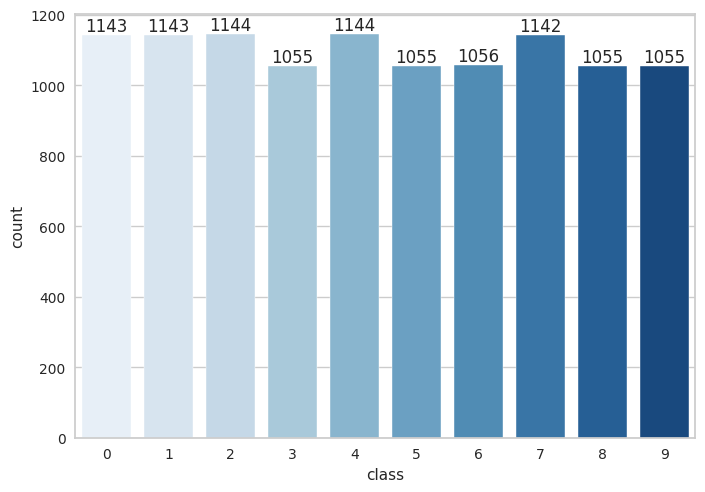

In [11]:
# Targer Feature `Class`

ax = sns.countplot( data=df, x="class", palette='Blues')
ax.bar_label(ax.containers[0])
plt.show()

Text(0.5, 1.0, 'Boxplot of Class Feature')

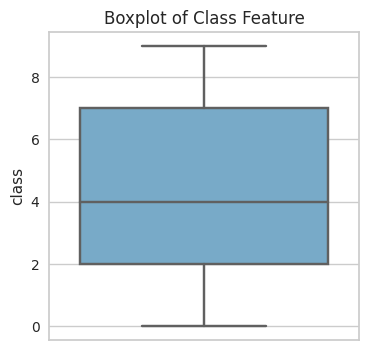

In [59]:
plt.figure(figsize=(4,4))
sns.boxplot(y=df['class'],palette='Blues')
plt.title('Boxplot of Class Feature')

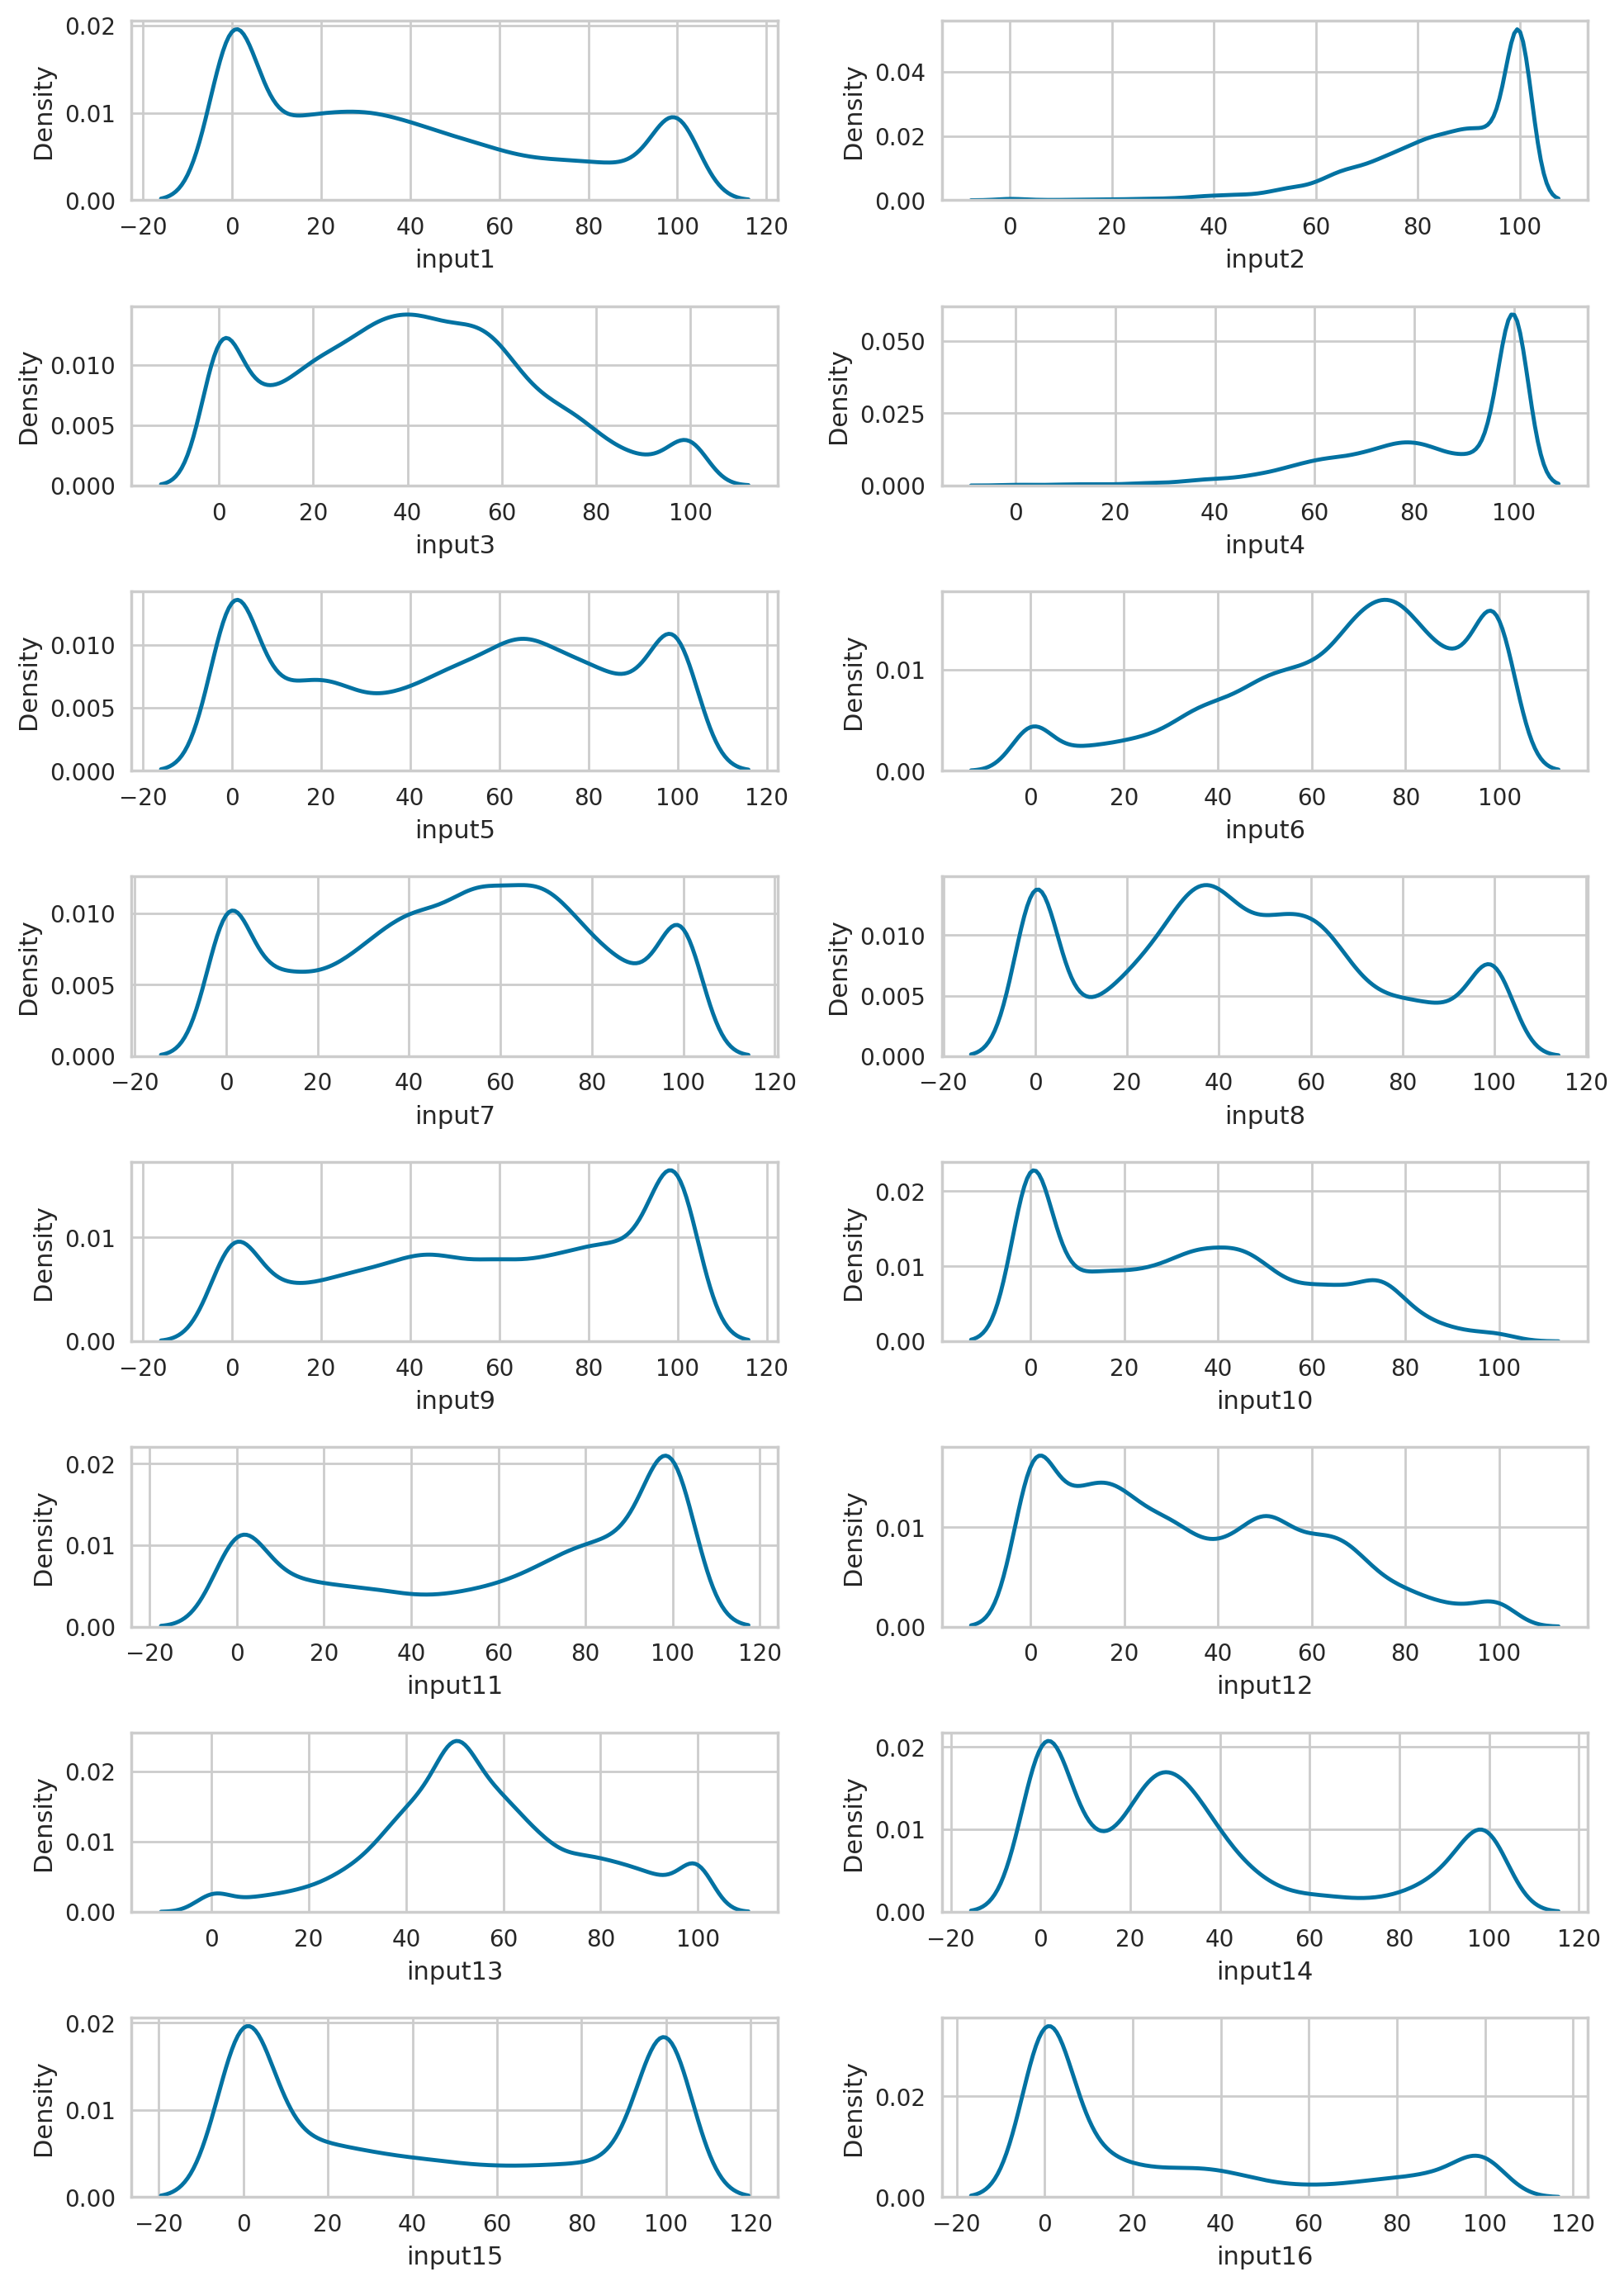

In [8]:
# Distributions of all Features;

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

- The density plots show that many features have multiple peaks, indicating the presence of different subgroups in the data. 
- Some features are skewed, and the range of values varies across the features. 
- The presence of negative values suggests specific data characteristics or transformations. 
- Overall, the dataset is complex, which may pose challenges for modeling.

    - **Unimodal normal distribution** is a distribution with a single peak or mode, representing a single most frequent value in the dataset.
    - **Bimodal normal distribution** is a distribution with two distinct peaks or modes.
    - **Multimodal normal distribution** refers to a distribution with three or more peaks.
        - This type of distribution may indicate the presence of two or more distinct subpopulations within the dataset or that an external factor has influenced the distribution.
    - **Bimodal-Multimodal normal distributions** can occur when the means and standard deviations of the subpopulations differ significantly from each other.


<a id='data-visualisation'></a>
## Correlations

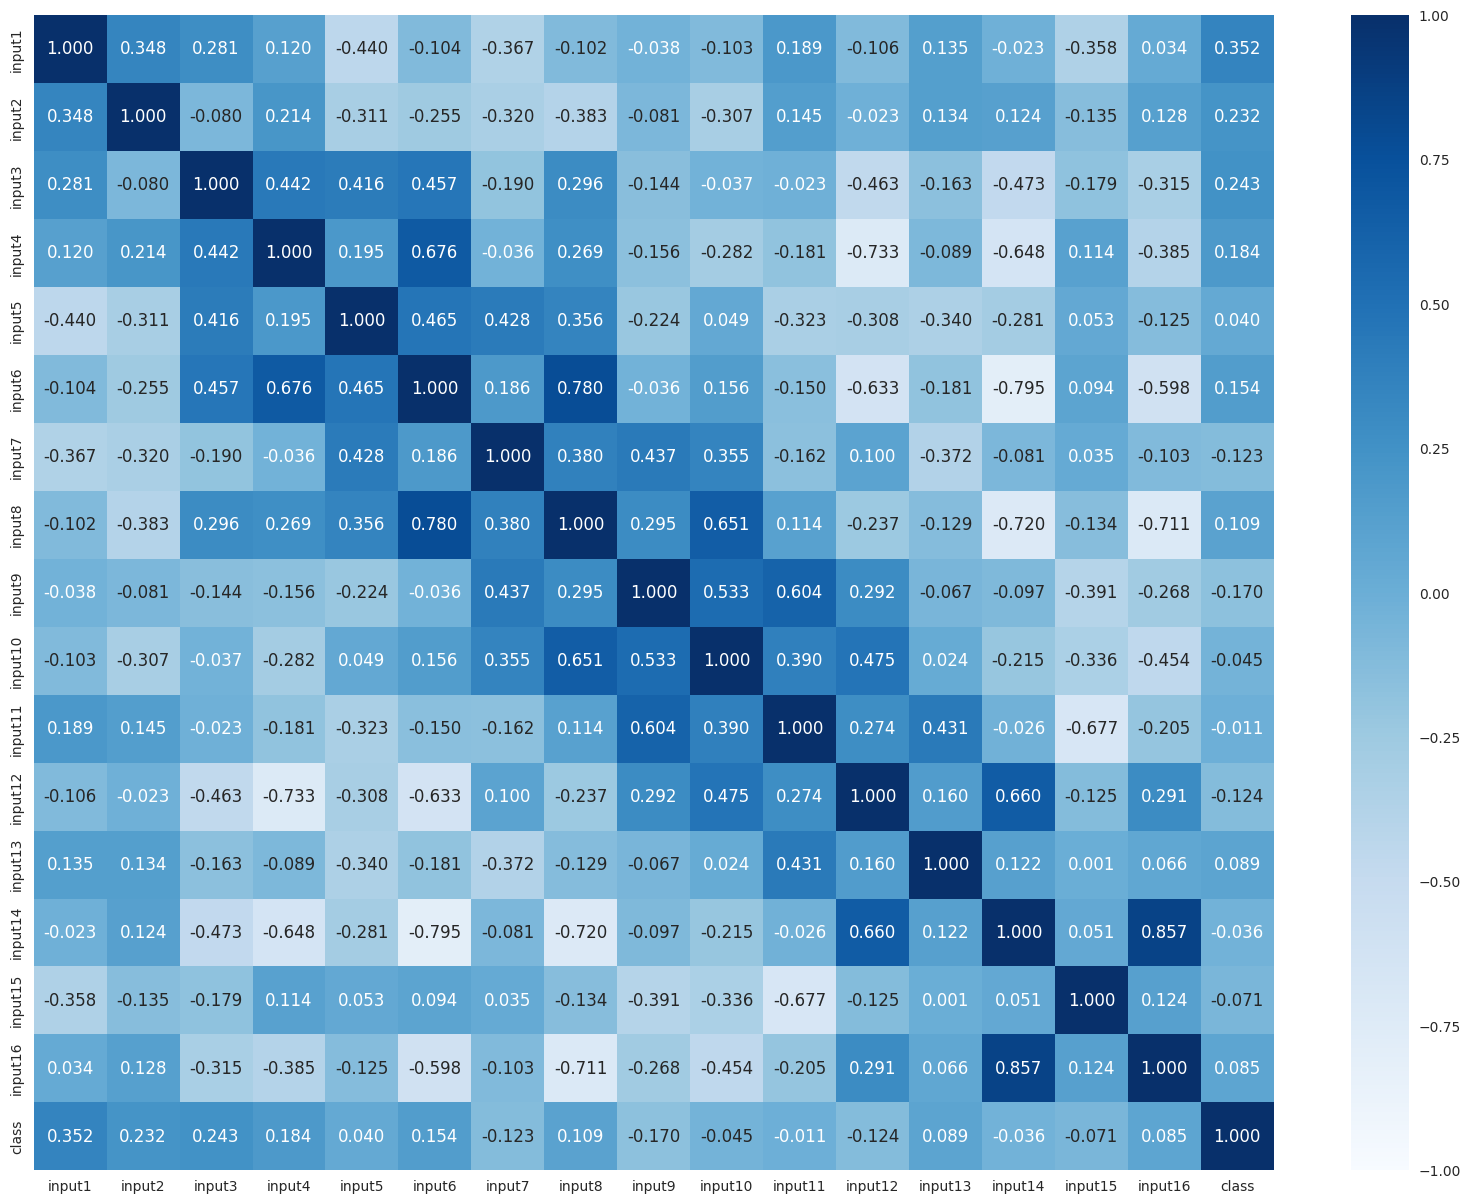

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.3f', cmap='Blues');

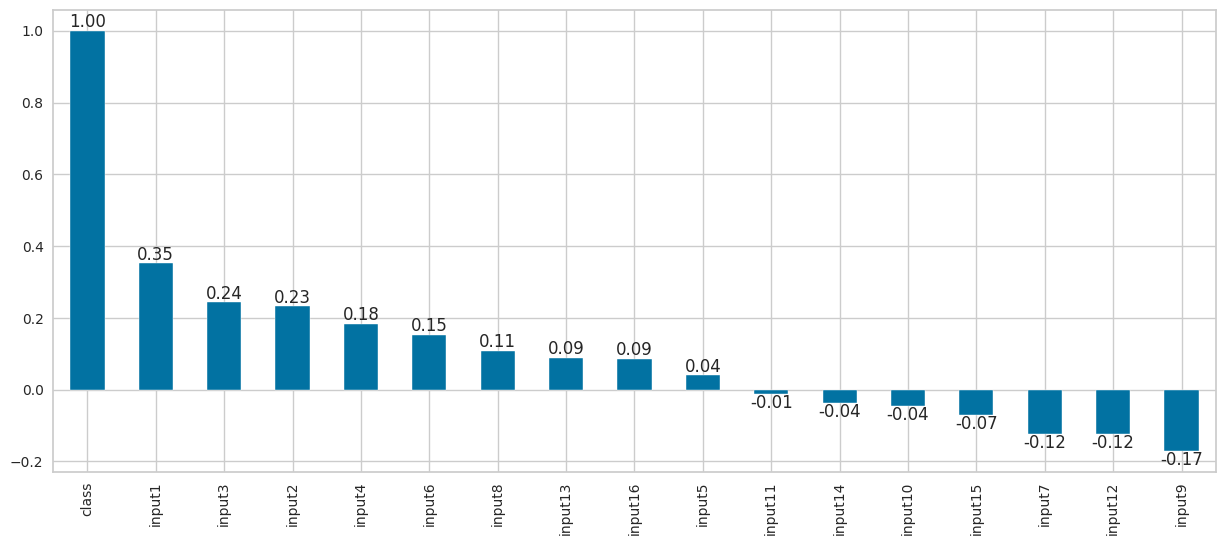

In [49]:
correlation_matrix = df.corr() # Labeled df
price_corr = correlation_matrix['class'].sort_values(ascending= False)

ax =  price_corr.plot(kind='bar',figsize=(15,6))
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

- **Highest Correlation:** `input1` has the highest positive correlation (0.35), indicating a strong linear relationship with the `class` variable.
- **Negative Correlations:** `input9` has the lowest negative correlation (-0.17), suggesting an inverse relationship with `class`.
- **Low Correlations:** Some features, such as `input11`, `input14`, and `input15`, have correlations close to zero, indicating they have little to no linear impact on `class`.

<a id='data-visualisation'></a>
##  Outlier Analysis

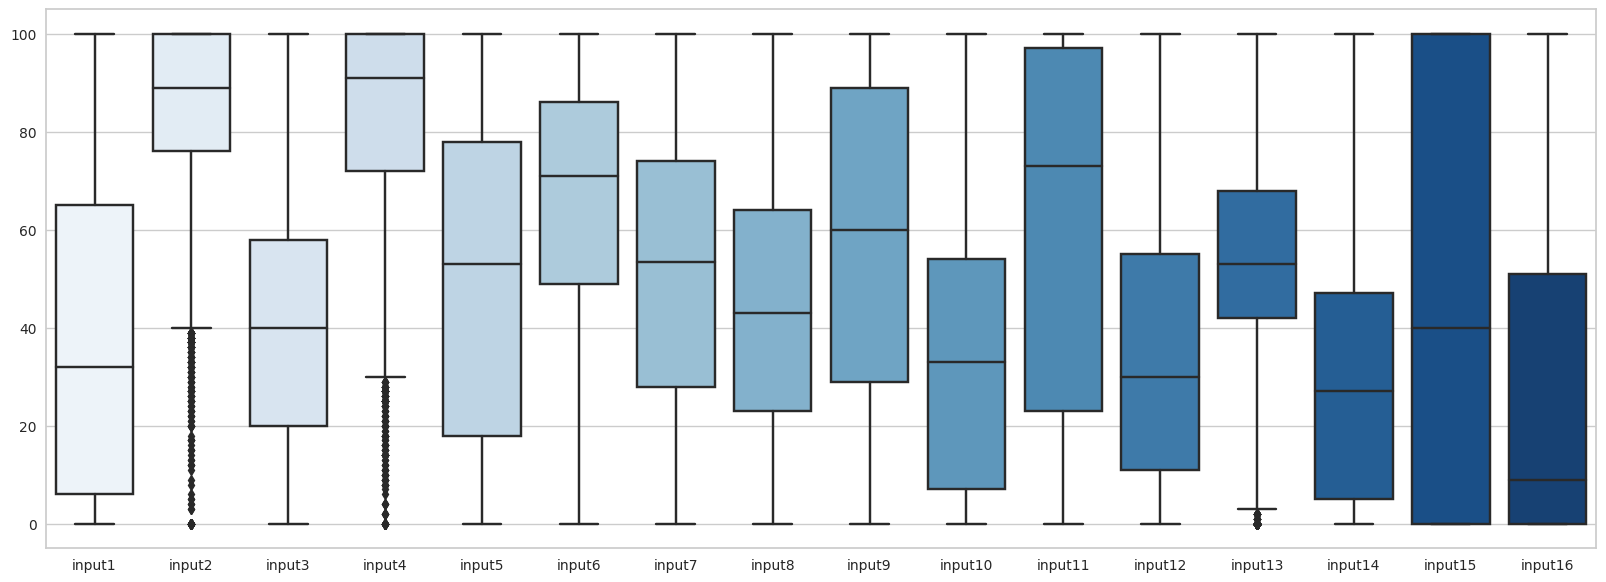

In [34]:
# Boxplot of all features by target 

plt.figure(figsize=(20,7))
sns.boxplot(data=df.drop("class", axis=1),palette='Blues');

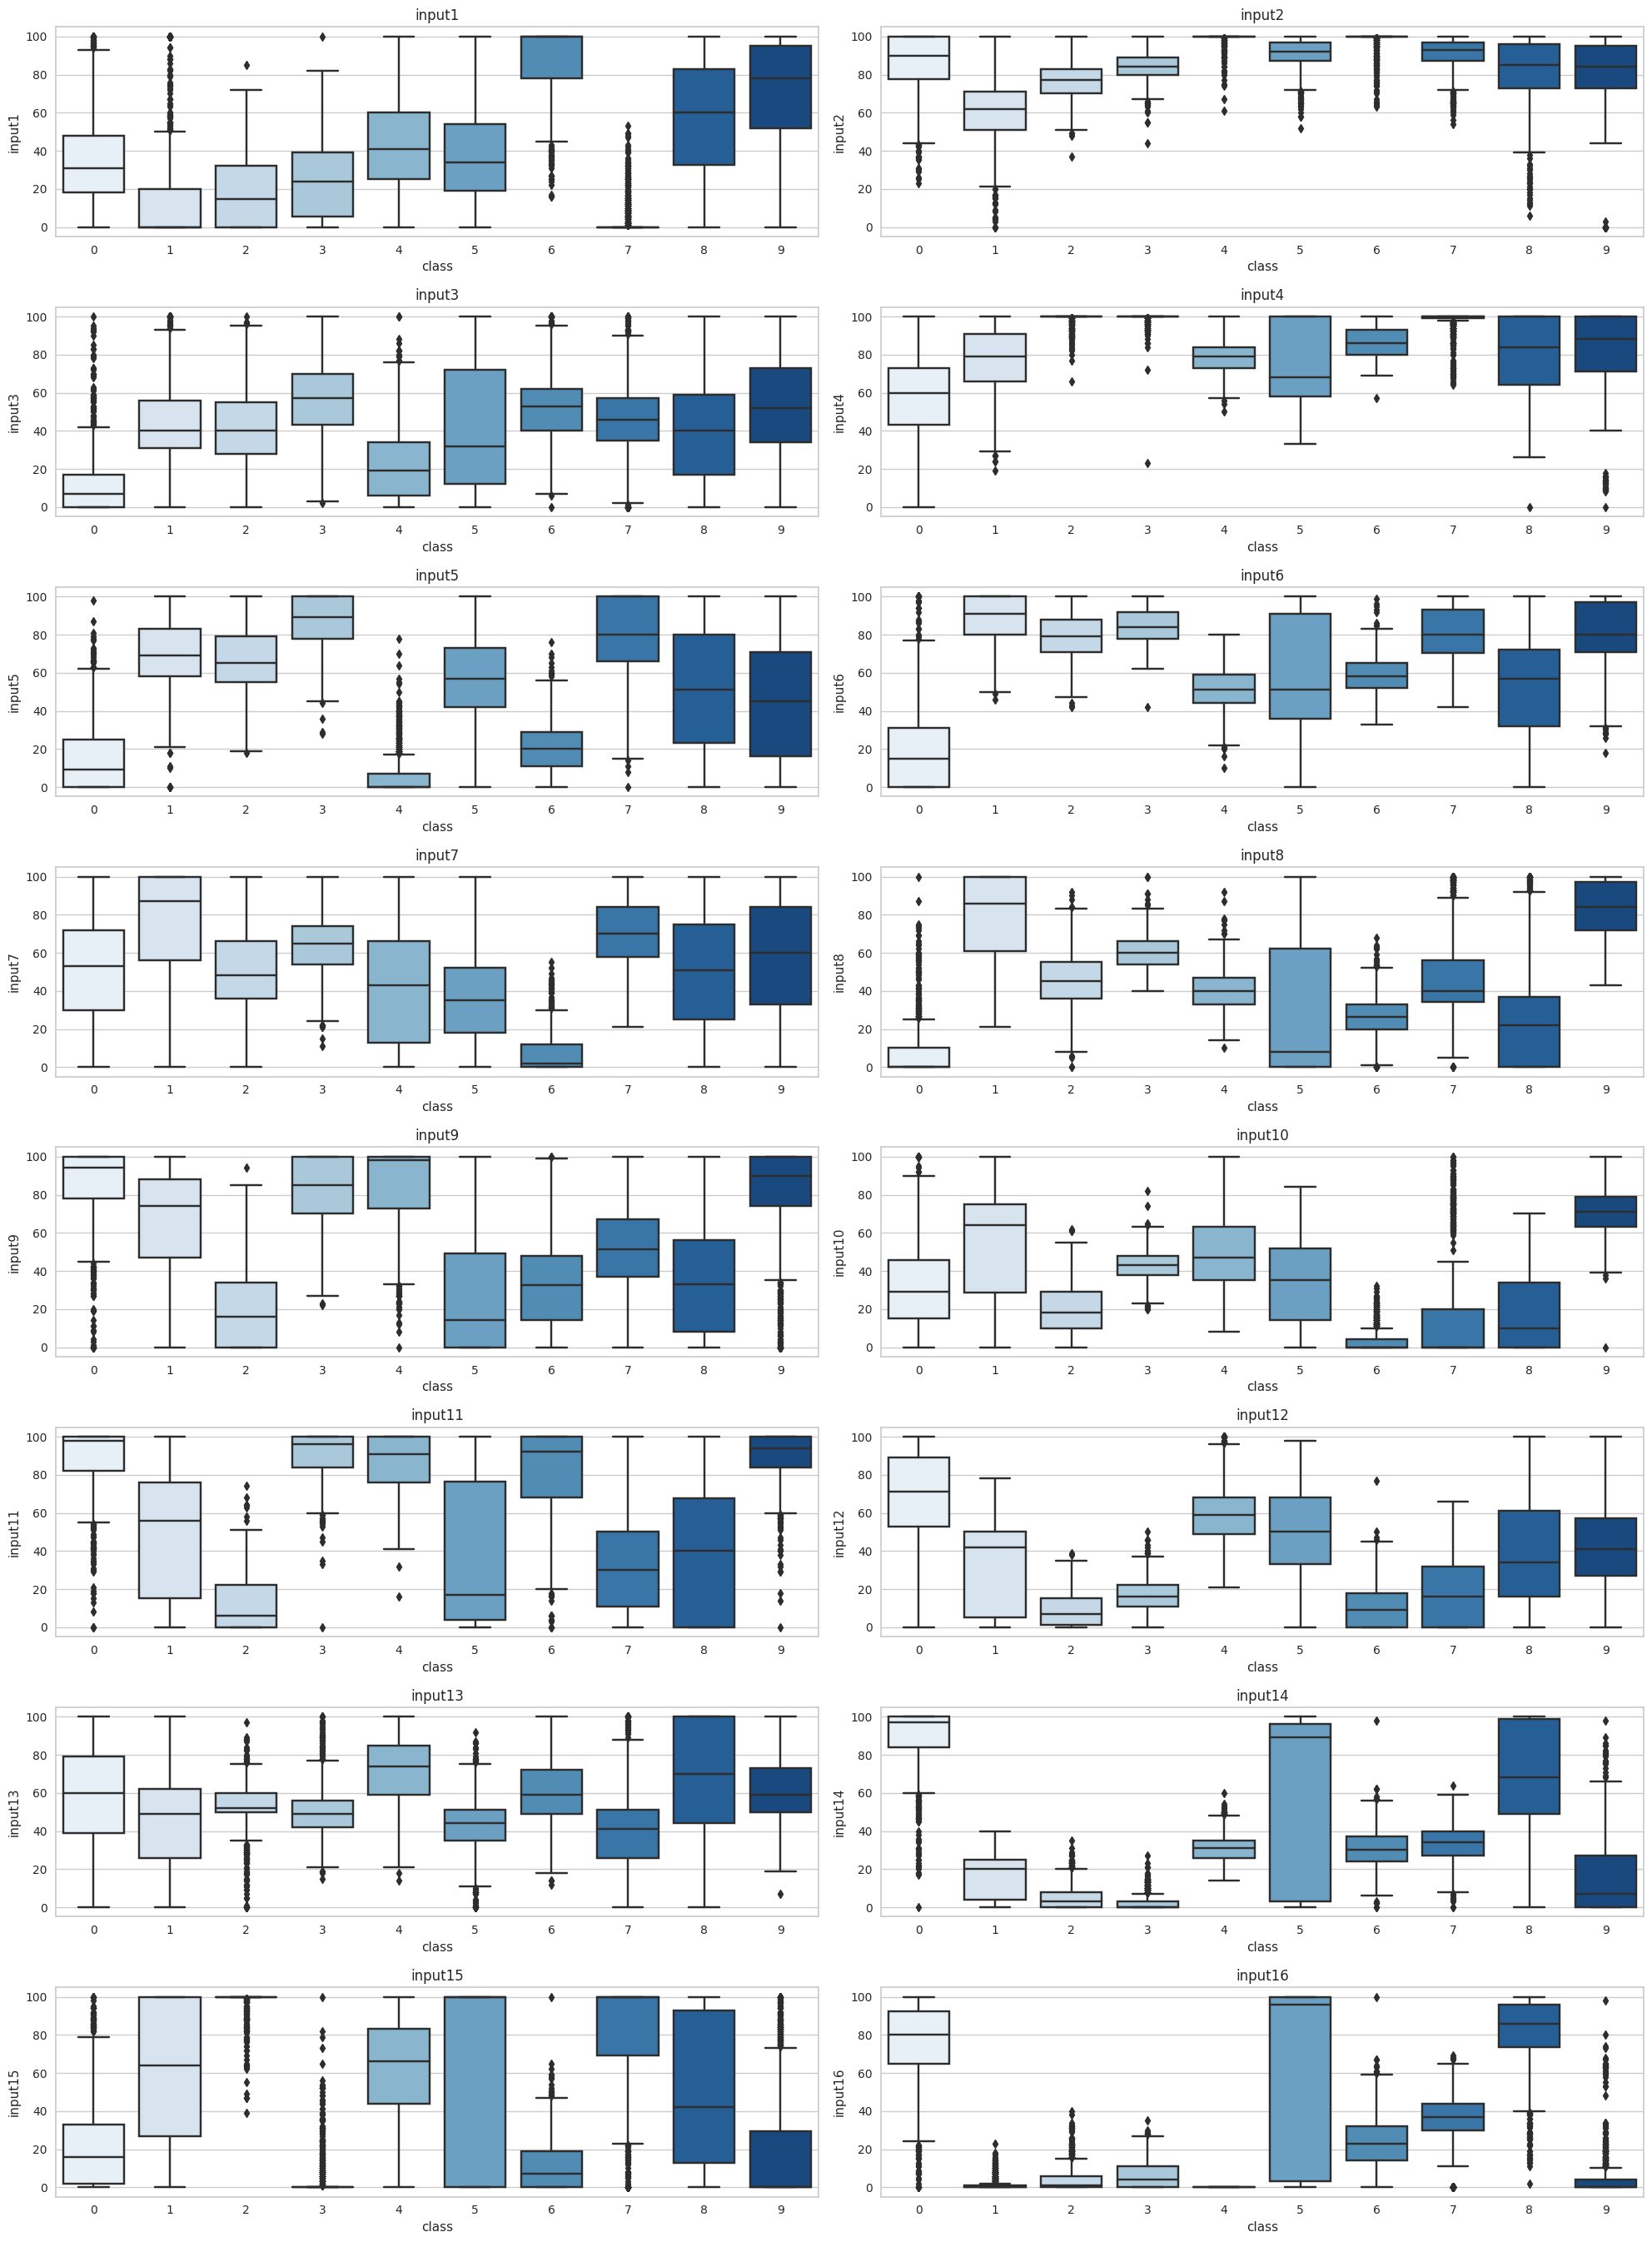

In [36]:
# 2) Boxplotting all Features with the values by target

plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(9, 2, i)
    plt.title(col)
    sns.boxplot(x='class', y=col, data=df,palette='Blues')
plt.tight_layout()  
plt.show()

- **Wide Distributions:** Some features, particularly `input5`, `input7`, and `input11`, have a wide range of data values. This indicates that the data points for these features are more varied.

- **Outliers:** Features like `input2` and `input4` exhibit significant outliers. This suggests that some data points in these features deviate considerably from the general distribution.

- **Symmetric and Asymmetric Distributions:** While most features show relatively symmetric boxplots, a few exhibit noticeable asymmetry, indicating skewness in the distribution.

*However, I will not intervene with outliers at the moment, but could take an action later according to the model's forecasting performance.*

<a id='machine-learning'></a>
# <font color=#20a0ff> <b>  MACHINE LEARNING</b><font color='orange'>

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Data Preprocessing</b><font color='black'>

In [61]:
# Train Test Split
X = df.drop("class", axis = 1)
y = df["class"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    shuffle=False,
                                                    random_state=42)

In [77]:
# Scaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

In [94]:
# Function to Evaluate the Model Performans using Classification Confusion_matrix() 
# Also does the prediction in the function

def eval_metric(model, X_train, y_train, X_test, y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('--------------------------------------------------------')
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Support Vector Machine Classification (SVM)</b><font color='black'>

In [ ]:
# Set and scale
svm_model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(kernel="rbf", random_state=101))])

#Fit the model
svm_model.fit(X_train, y_train)

### Evaluating The Model Performance

In [98]:
#Prediction
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

# Evaluating the Model Performance Scores
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('----------------------------------------------------')
print('SVM_accuracy_test:', SVM_accuracy_test)
print('SVM_accuracy_train:', SVM_accuracy_train)
print('svm_f1_test:', svm_f1_test)
print('svm_f1_train:', svm_f1_train)
print('----------------------------------------------------')

# Evaluating the Model Performance using Classification Metrics
eval_metric(svm_model, X_train, y_train, X_test, y_test, 'svm_model')

----------------------------------------------------
SVM_accuracy_test: 0.9890909090909091
SVM_accuracy_train: 0.9957541447634453
svm_f1_test: 0.9890717989037039
svm_f1_train: 0.9957670665493271
----------------------------------------------------
svm_model Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 108   1   0   0   0   0   1   0   0]
 [  0   1 119   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 117   2   0   0   0   0]
 [  0   0   0   2   0  96   0   0   0   1]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   1   0   0   0   0   0 109   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   0   0   0   0   2   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.98      0.98      0.98       110
           2       0.99      0.99      0.99       120
           3       0.98      0.99      0.99       116
           4       1.00      0.

###  Model Validation

In [73]:
# Cross Validation Scores of the Model Performance

model =  Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(kernel="rbf", random_state=101))])

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.992418
train_accuracy           0.995501
test_precision_macro     0.992449
train_precision_macro    0.995520
test_recall_macro        0.992526
train_recall_macro       0.995529
test_f1_macro            0.992460
train_f1_macro           0.995517
dtype: float64

### Hyperparameter Optimization for SVM Model

In [74]:
svm_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('SVC', SVC(random_state=101))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'SVC': SVC(random_state=101),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 101,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [85]:
# SVM Model Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler",MinMaxScaler()),("SVM", SVC(kernel="rbf", probability=True))]) 


param_grid = {'SVM__C':[ 1,10,15],
              'SVM__gamma':["scale", "auto"]
             }

svm_grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

svm_grid_model

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1, 10, 15],
                         'SVM__gamma': ['scale', 'auto']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [86]:
svm_grid_model.best_params_

{'SVM__C': 15, 'SVM__gamma': 'scale'}

### Evaluating The Model Performance

In [101]:
#Prediction
y_pred_test = svm_grid_model.predict(X_test)
y_pred_train = svm_grid_model.predict(X_train)

# Evaluating the Model Performance Scores
svm_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
svm_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('svm_grid_accuracy_test:', svm_grid_accuracy_test)
print('svm_grid_accuracy_train:', svm_grid_accuracy_train)
print('svm_grid_f1_test:', svm_grid_f1_test)
print('svm_grid_f1_train:', svm_grid_f1_train)

print('---------------------------------------------')
# Evaluating the Model Performance using Classification Metrics
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test, 'svm_grid_model')

svm_grid_accuracy_test: 0.9927272727272727
svm_grid_accuracy_train: 0.9989890820865346
svm_grid_f1_test: 0.9927187020388594
svm_grid_f1_train: 0.9989841997564615
---------------------------------------------
svm_grid_model Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 109   0   0   0   0   0   1   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   1   0  97   0   0   0   1]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   1   0   0   0   0   0 109   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   1   0   0   0   2   0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.99      0.99      0.99       110
           2       1.00      1.00      1.00       120
           3       0.98      0.99      0.99       116
           4       1.00      1.00      1.00       119
           5

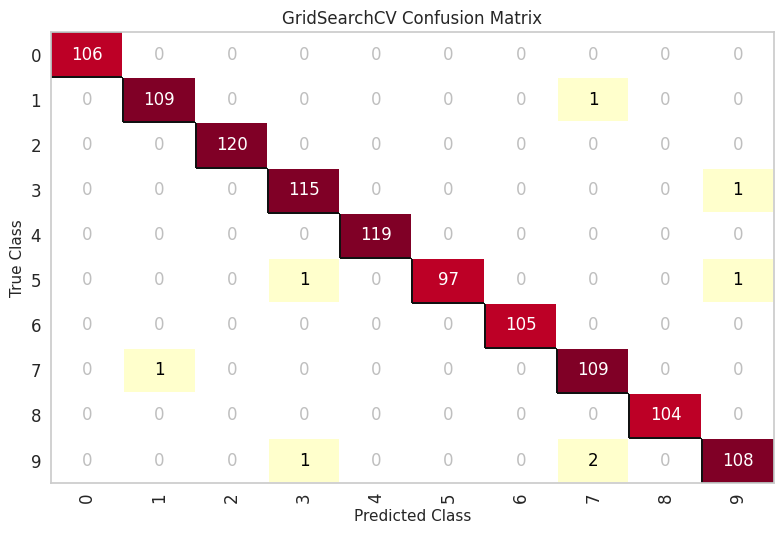

In [95]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(svm_grid_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();

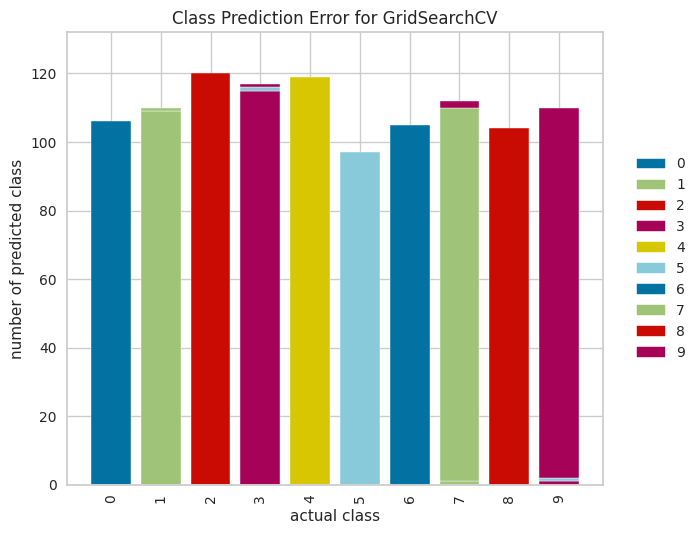

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [88]:
visualizer = ClassPredictionError(svm_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

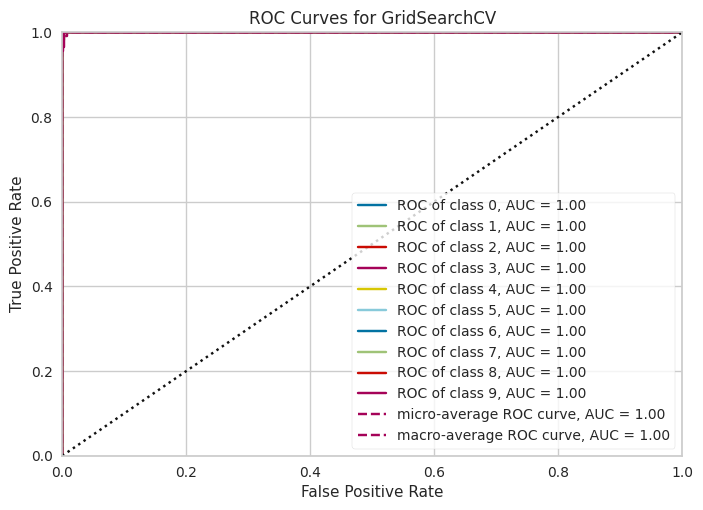

In [89]:
visualizer = ROCAUC(svm_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### Comparing the SVM Models

1. **SVM Grid Model**:
   - **Test Accuracy**: 0.9927
   - **Train Accuracy**: 0.9989
   - **Test F1 Score**: 0.9927
   - **Train F1 Score**: 0.9989

2. **SVM Model**:
   - **Test Accuracy**: 0.9890
   - **Train Accuracy**: 0.9957
   - **Test F1 Score**: 0.9890
   - **Train F1 Score**: 0.9957

**Comparison**:
- The **SVM Grid Model** slightly outperforms the standard **SVM Model** in both accuracy and F1 score on both the training and test sets.
- The differences are minimal but consistent, indicating that the grid search fine-tuning provided a marginal performance improvement.
- Both models demonstrate high performance, with the Grid model showing slightly better generalization on the test data.

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Decision Tree Classification (DTC)</b><font color='black'>

In [105]:
# Set and scale
DT_model = DecisionTreeClassifier(random_state=101) # No need to scale for Tree Models

#Fit the model
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

### Evaluating The Model Performance

In [106]:
#Prediction
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

# Evaluating the Model Performance Scores
DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('----------------------------------------------------')
print('DT_accuracy_test:', DT_accuracy_test)
print('DT_accuracy_train:', DT_accuracy_train)
print('DT_f1_test:', DT_f1_test)
print('DT_f1_train:', DT_f1_train)
print('----------------------------------------------------')

# Evaluating the Model Performance using Classification Metrics
eval_metric(DT_model, X_train, y_train, X_test, y_test, 'DT_model')

----------------------------------------------------
DT_accuracy_test: 0.9572727272727273
DT_accuracy_train: 1.0
DT_f1_test: 0.9571347237434311
DT_f1_train: 1.0
----------------------------------------------------
DT_model Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   1 118   0   0   0   0   1   0   0]
 [  0   3   0 110   0   0   0   2   0   1]
 [  0   0   0   0 117   1   1   0   0   0]
 [  0   0   0   5   0  90   0   1   0   3]
 [  3   1   1   0   0   0 100   0   0   0]
 [  0   6   2   0   0   1   0  99   1   1]
 [  2   0   0   0   0   0   0   0 102   0]
 [  0   0   0   2   1   0   1   1   0 106]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       106
           1       0.91      0.95      0.93       110
           2       0.94      0.98      0.96       120
           3       0.94      0.95      0.94       116
           4       0.99      0.98      0.99       119
           5

###  Model Validation

In [107]:
# Cross Validation Scores of the Model Performance

model =  DecisionTreeClassifier()

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.955316
train_accuracy           1.000000
test_precision_macro     0.955822
train_precision_macro    1.000000
test_recall_macro        0.955462
train_recall_macro       1.000000
test_f1_macro            0.955436
train_f1_macro           1.000000
dtype: float64

### Hyperparameter Optimization for DT Model

In [108]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [ ]:
# DT Model Hyperparameters Tuning with GridSearchSV 

model = DecisionTreeClassifier()

param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             }

DT_grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

In [112]:
DT_grid_model

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [114]:
DT_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180}

### Evaluating The Model Performance

In [115]:
#Prediction
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

# Evaluating the Model Performance Scores
DT_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('DT_grid_accuracy_test:', DT_grid_accuracy_test)
print('DT_grid_accuracy_train:', DT_grid_accuracy_train)
print('DT_grid_f1_test:', DT_grid_f1_test)
print('DT_grid_f1_train:', DT_grid_f1_train)

print('---------------------------------------------')
# Evaluating the Model Performance using Classification Metrics
eval_metric(DT_grid_model, X_train, y_train, X_test, y_test, 'DT_grid_model')

DT_grid_accuracy_test: 0.9563636363636364
DT_grid_accuracy_train: 0.9711888394662354
DT_grid_f1_test: 0.9567899509438416
DT_grid_f1_train: 0.9710680122624465
---------------------------------------------
DT_grid_model Test_Set
[[105   0   0   0   0   0   0   0   1   0]
 [  0  98  11   1   0   0   0   0   0   0]
 [  0   3 114   1   0   0   0   0   0   2]
 [  0   0   0 115   0   1   0   0   0   0]
 [  0   1   0   0 118   0   0   0   0   0]
 [  0   0   0   2   0  91   0   0   1   5]
 [  1   0   1   1   0   0 101   0   1   0]
 [  0   3   2   1   0   0   0 103   0   1]
 [  1   0   0   0   0   0   0   0 103   0]
 [  0   2   0   3   0   0   0   2   0 104]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.92      0.89      0.90       110
           2       0.89      0.95      0.92       120
           3       0.93      0.99      0.96       116
           4       1.00      0.99      1.00       119
           5     

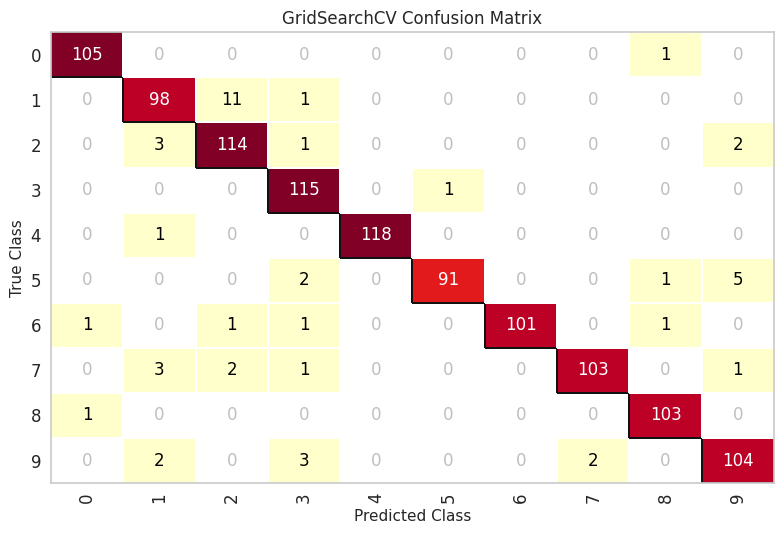

In [116]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(DT_grid_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();

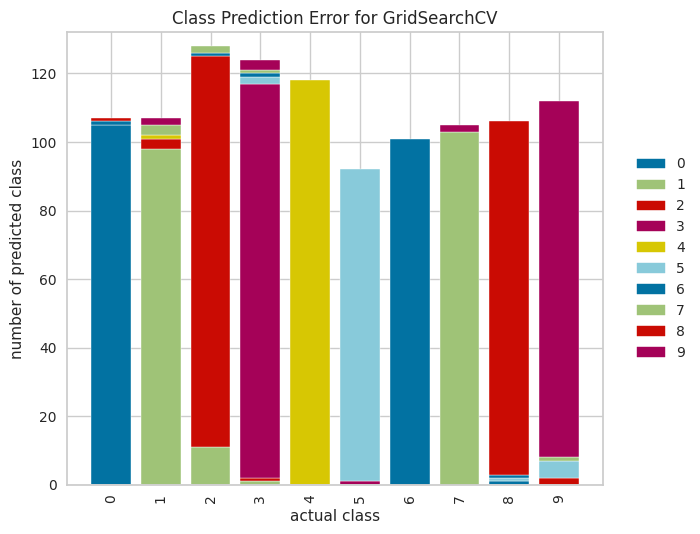

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [117]:
visualizer = ClassPredictionError(DT_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

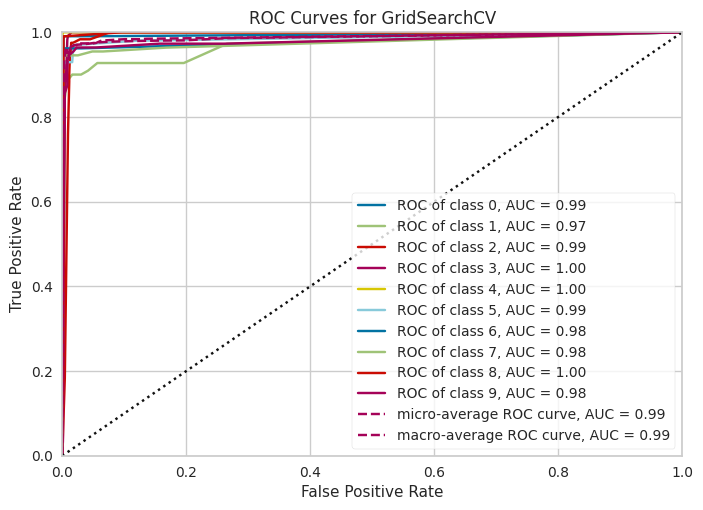

In [118]:
visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### Comparing the Decision Tree Models

1. **Decision Tree (DT) Model**:
   - **Test Accuracy**: 0.9573
   - **Train Accuracy**: 1.0
   - **Test F1 Score**: 0.9571
   - **Train F1 Score**: 1.0

2. **Decision Tree Grid Model**:
   - **Test Accuracy**: 0.9564
   - **Train Accuracy**: 0.9712
   - **Test F1 Score**: 0.9568
   - **Train F1 Score**: 0.9711

**Comparison**:
- The standard **DT Model** has perfect training scores, which likely indicates overfitting, as it performs slightly better on the training set but not as well on the test set.
- The **DT Grid Model** shows a more balanced performance, with slightly lower training scores, which suggests better generalization and less overfitting compared to the standard DT Model.

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Random Forest Classification (RFC)</b><font color='black'>

In [122]:
#Model (no need to scale the Tree Models)
RF_model = RandomForestClassifier(n_estimators=100, random_state=101)

#Fit the Model
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

### Evaluating The Model Performance

In [123]:
#Prediction
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

# Evaluating the Model Performance Scores
RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('----------------------------------------------------')
print('RF_accuracy_test:', RF_accuracy_test)
print('RF_accuracy_train:', RF_accuracy_train)
print('RF_f1_test:', RF_f1_test)
print('RF_f1_train:', RF_f1_train)
print('----------------------------------------------------')

# Evaluating the Model Performance using Classification Metrics
eval_metric(RF_model, X_train, y_train, X_test, y_test, 'RF_model')

----------------------------------------------------
RF_accuracy_test: 0.9854545454545455
RF_accuracy_train: 1.0
RF_f1_test: 0.9856326999333506
RF_f1_train: 1.0
----------------------------------------------------
RF_model Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   2 118   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   3   0  95   0   0   0   1]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   2   1   0   0   0   0 107   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   0   0   0   0   2   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.96      0.95      0.96       110
           2       0.95      0.98      0.97       120
           3       0.97      1.00      0.99       116
           4       1.00      1.00      1.00       119
           5

###  Model Validation

In [124]:
# Cross Validation Scores of the Model Performance

model =  RandomForestClassifier()

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                        cv=5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

test_accuracy            0.988172
train_accuracy           1.000000
test_precision_macro     0.988393
train_precision_macro    1.000000
test_recall_macro        0.988375
train_recall_macro       1.000000
test_f1_macro            0.988304
train_f1_macro           1.000000
dtype: float64

### Hyperparameter Optimization for SVM Model

In [125]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# SVM Model Hyperparameters Tuning with GridSearchSV 

model = RandomForestClassifier()

param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

RF_grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

In [129]:
RF_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180,
 'n_estimators': 100}

### Evaluating The Model Performance

In [130]:
#Prediction
y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

# Evaluating the Model Performance Scores
RF_grid_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_grid_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_grid_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_grid_f1_train = f1_score(y_train, y_pred_train, average='macro')

print('RF_grid_accuracy_test:', RF_grid_accuracy_test)
print('RF_grid_accuracy_train:', RF_grid_accuracy_train)
print('RF_grid_f1_test:', RF_grid_f1_test)
print('RF_grid_f1_train:',RF_grid_f1_train)

print('---------------------------------------------')
# Evaluating the Model Performance using Classification Metrics
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test, 'RF_grid_model')

RF_grid_accuracy_test: 0.9781818181818182
RF_grid_accuracy_train: 0.9927213910230489
RF_grid_f1_test: 0.9782903956812433
RF_grid_f1_train: 0.9927662392429477
---------------------------------------------
RF_grid_model Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 103   7   0   0   0   0   0   0   0]
 [  0   0 119   1   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   3   0  94   0   0   0   2]
 [  1   0   0   0   0   0 103   0   1   0]
 [  0   4   1   2   0   0   0 103   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   1   0   0   0   0   0   1   0 109]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       0.95      0.94      0.94       110
           2       0.94      0.99      0.96       120
           3       0.95      1.00      0.97       116
           4       1.00      1.00      1.00       119
           5     

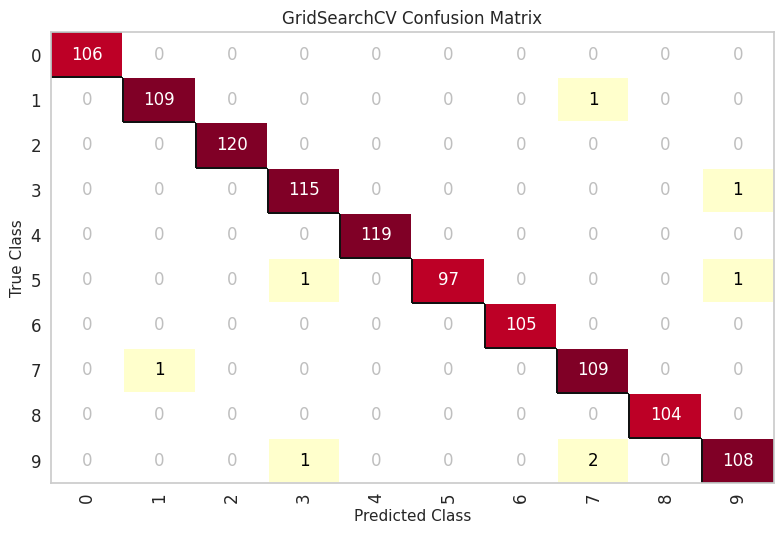

In [95]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(svm_grid_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();

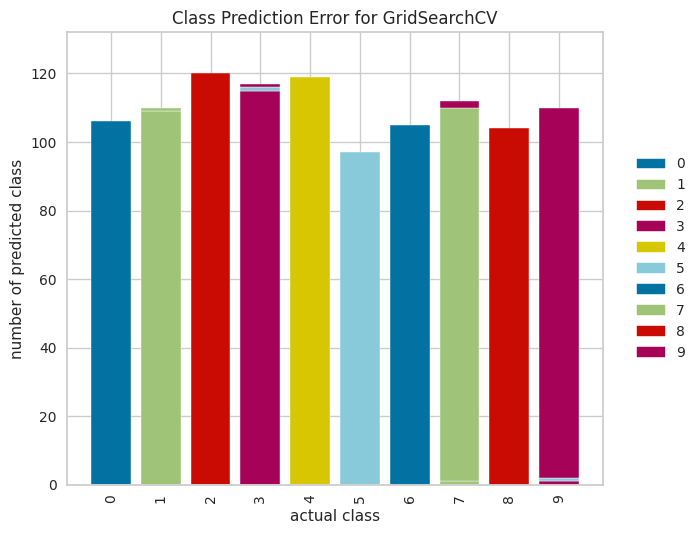

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [88]:
visualizer = ClassPredictionError(svm_grid_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

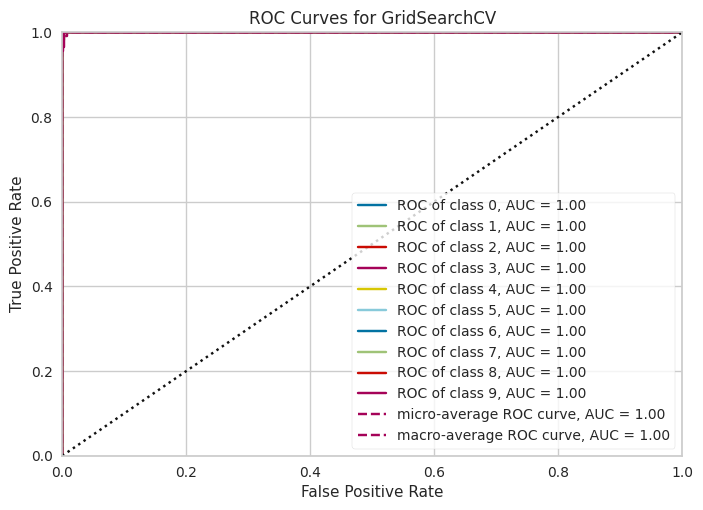

In [89]:
visualizer = ROCAUC(svm_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### Comparing the RF Models

Based on the provided accuracy and F1 scores:

1. **Random Forest (RF) Grid Model**:
   - **Test Accuracy**: 0.9782
   - **Train Accuracy**: 0.9927
   - **Test F1 Score**: 0.9783
   - **Train F1 Score**: 0.9928

2. **Random Forest (RF) Model**:
   - **Test Accuracy**: 0.9855
   - **Train Accuracy**: 1.0
   - **Test F1 Score**: 0.9856
   - **Train F1 Score**: 1.0

**Comparison**:
- The **RF Model** shows perfect training scores, indicating overfitting, as it performs perfectly on the training set but slightly less well on the test set.
- The **RF Grid Model** demonstrates slightly lower training scores, indicating better generalization and less overfitting compared to the standard RF Model, although its performance on the test set is marginally lower. 

Overall, the RF Grid Model offers a better balance between training and test performance, suggesting it might generalize better to unseen data.

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Comparing All the Models </b><font color='black'>

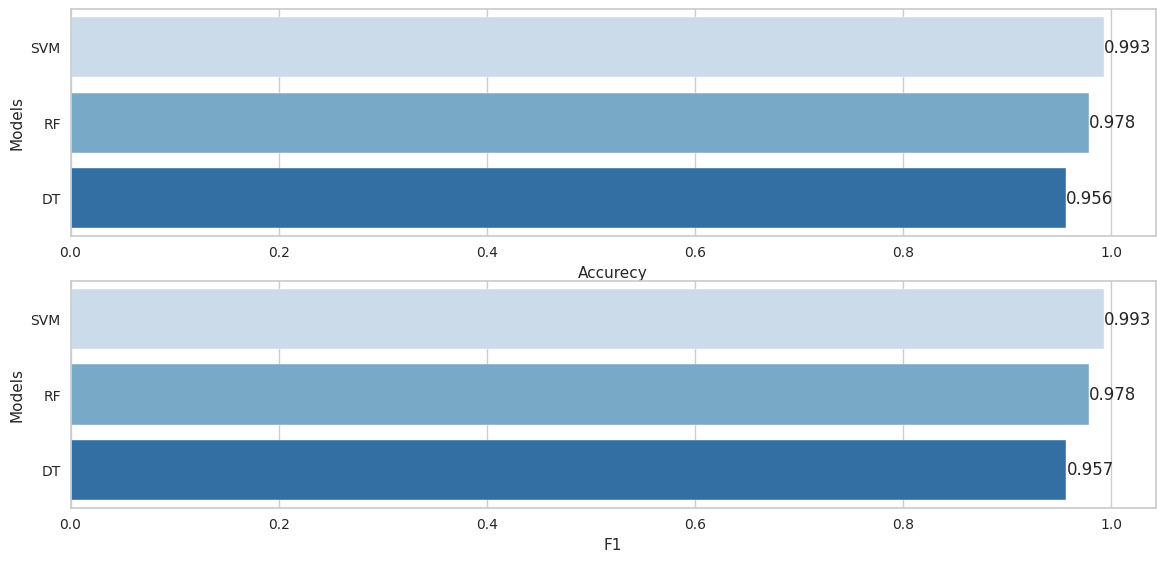

In [132]:
# Accurecy and F1 Test-Data Scores of the Grid Models

compare = pd.DataFrame({"Models": ["SVM", "DT","RF"],
                        "Accurecy": [svm_grid_accuracy_test, DT_grid_accuracy_test, RF_grid_accuracy_test],
                        "F1": [svm_grid_f1_test,DT_grid_f1_test, RF_grid_f1_test]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
     
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="Accurecy", ascending=False)
ax=sns.barplot(x="Accurecy", y="Models", data=compare, palette="Blues")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Models", data=compare, palette="Blues")
labels(ax)

plt.show()

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Final Model and Deployment</b><font color='black'>

In [133]:
# SVM Model Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler",MinMaxScaler()),("SVM", SVC(kernel="rbf", probability=True))]) 


param_grid = {'SVM__C':[ 1,10,15],
              'SVM__gamma':["scale", "auto"]
             }

svm_grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

svm_grid_model

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1, 10, 15],
                         'SVM__gamma': ['scale', 'auto']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# Export the final model to your local -> serilarization

import pickle
pickle.dump(final_svm_model, open("final_digit_class_model", "wb"))

In [ ]:
# Import the final model to use -> deserilization

new_model = pickle.load(open("final_digit_class_model", "rb"))
new_model

<a id='simple-lr'></a>
## <font color=#20a0ff> <b>Conclution</b><font color='black'>

---

**Final Model:** SVM Model with GridSearchCV

*Parameters:* 
- Accuracy: 0.993 
- f1: 0.993   
- Incorrect Predictions: 8
---

**Overall:**

In this project, we used SVM, Random Forest, and Decision Tree models to classify handwritten digits based on coordinate-based features. Given the complexity of the dataset, we prioritized accuracy and F1 scores to evaluate model performance, ensuring both precision and recall were balanced.

- **SVM Model**: Demonstrates the highest performance with both accuracy and F1 scores at 0.993.
- **Random Forest (RF) Model**: Follows closely behind SVM with accuracy and F1 scores of 0.978.
- **Decision Tree (DT) Model**: Shows the lowest performance among the three, with accuracy at 0.956 and F1 score at 0.957.

**Final Model Selection:**

Based on the results, the **SVM model** was selected as the final model. It consistently outperforms the other models in both accuracy and F1 score, indicating its strong ability to generalize and accurately classify the data.

**Reason:**

- **High Accuracy and F1 Score**: The SVM model achieves the highest accuracy and F1 score, which suggests it is the best at both correctly predicting the class labels (accuracy) and balancing precision and recall (F1 score).
  
- **Data Characteristics**: Given the nature of the dataset, which involves complex patterns due to high-dimensional coordinate-based features, SVM's ability to find an optimal hyperplane in high-dimensional space makes it particularly effective.

- **Importance of F1 Score**: The F1 score is especially important in cases where the dataset may be imbalanced, ensuring that the model is not only accurate but also effective at managing false positives and false negatives. SVM excels in this regard, as shown by its top F1 score.

<h3 align="center">If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬</h3>

<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<p align="right">
  Duygu Jones | Data Scientist | 2024
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>
</p>